<a href="https://colab.research.google.com/github/chetane/businessreport/blob/main/Enron__Data_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-21 16:38:06--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-21 16:38:08--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  34.9MB/s    in 27s     

2023-05-21 16:38:35 (30.

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import seaborn as sns

In [ ]:
conn = sqlite3.connect("enron.db")

In [ ]:
cur = conn.cursor()

In [ ]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)


,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


In [ ]:
query = "PRAGMA table_info(employeelist);"
pd.read_sql_query(query, conn)


,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [ ]:
query = "SELECT mid, sender, date, message_id, subject, body, folder FROM Message;"
df = pd.read_sql_query(query, conn)
df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
# Filter emails where sender is 'john.doe@enron.com'
filtered_df = df[df['sender'] == 'john.doe@enron.com']
df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
# Group by sender and count the number of emails sent
grouped_df = df.groupby('sender').size()
df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
# Find the date range of emails
date_range = df['date'].agg(['min', 'max'])
df

,mid,sender,date,message_id,subject,body,folder
0,52,press.release@enron.com,2000-01-21 04:51:00,<12435833.1075863606729.JavaMail.evans@thyme>,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...,Robert_Badeer_Aug2000Notes FoldersPress releases
1,53,office.chairman@enron.com,2000-01-24 01:37:00,<29664079.1075863606676.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
2,54,office.chairman@enron.com,2000-01-24 02:06:00,<15300605.1075863606629.JavaMail.evans@thyme>,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron...",Robert_Badeer_Aug2000Notes FoldersPress releases
3,55,press.release@enron.com,2000-02-02 10:21:00,<10522232.1075863606538.JavaMail.evans@thyme>,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a...",Robert_Badeer_Aug2000Notes FoldersPress releases
4,56,office.chairman@enron.com,2000-02-07 22:16:00,<16056123.1075863606515.JavaMail.evans@thyme>,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...,Robert_Badeer_Aug2000Notes FoldersPress releases
...,...,...,...,...,...,...,...
252754,404923,karen.buckley@enron.com,2002-02-06 16:51:29,<16183734.1075840015218.JavaMail.evans@thyme>,URGENT - NEED CONFIRMATION TODAY,X-FileName: Pls confirm at what location (i.e ...,"ExMerge - Dean, CraigInbox"
252755,404924,karen.buckley@enron.com,2002-02-06 17:17:39,<28117049.1075840015191.JavaMail.evans@thyme>,,X-FileName: Craig - I need the date and locati...,"ExMerge - Dean, CraigInbox"
252756,404925,liz.taylor@enron.com,2002-02-06 20:09:37,<32633742.1075840015168.JavaMail.evans@thyme>,Trader Presentations - 2/7 @ 2:30 p.m. (CST) i...,X-FileName: There will be two presentatio...,"ExMerge - Dean, CraigInbox"
252757,404926,pete.davis@enron.com,2002-02-07 04:38:13,<17912146.1075840015125.JavaMail.evans@thyme>,Start Date: 2/7/02; HourAhead hour: 3;,X-FileName: Start Date: 2/7/02; HourAhead hour...,"ExMerge - Dean, CraigInbox"


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df_clean = df.dropna()

# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df_clean = df_clean.drop_duplicates()

mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64
0


In [ ]:
# Ensure that the 'date' column is a datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')



In [ ]:
# Resample by day and count the number of emails
daily_counts = df.resample('D', on='date').size()

# Resample by week and count the number of emails
weekly_counts = df.resample('W', on='date').size()

# Resample by month and count the number of emails
monthly_counts = df.resample('M', on='date').size()


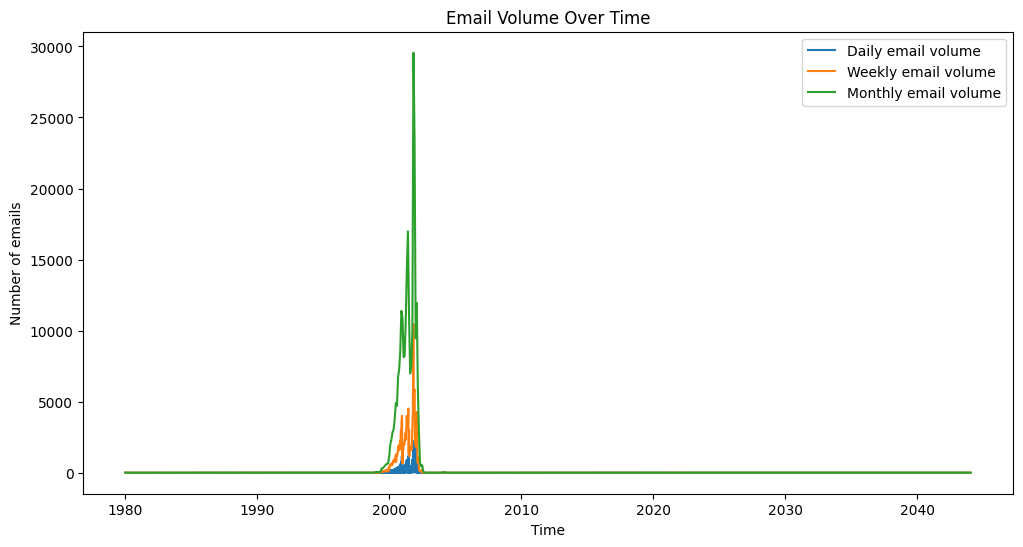

In [23]:
plt.figure(figsize=(12,6))
plt.plot(daily_counts.index, daily_counts.values, label='Daily email volume')
plt.plot(weekly_counts.index, weekly_counts.values, label='Weekly email volume')
plt.plot(monthly_counts.index, monthly_counts.values, label='Monthly email volume')
plt.xlabel('Time')
plt.ylabel('Number of emails')
plt.title('Email Volume Over Time')
plt.legend()
plt.show()


In [29]:
# Query to get the most frequent senders
query_senders = "SELECT sender, COUNT(*) as count FROM Message GROUP BY sender ORDER BY count DESC;"
df_senders = pd.read_sql_query(query_senders, conn)

# Query to get the most frequent recipients
query_rvalue = "SELECT rvalue, COUNT(*) as count FROM Recipientinfo GROUP BY rvalue ORDER BY count DESC;"
df_rvalue = pd.read_sql_query(query_rvalue, conn)

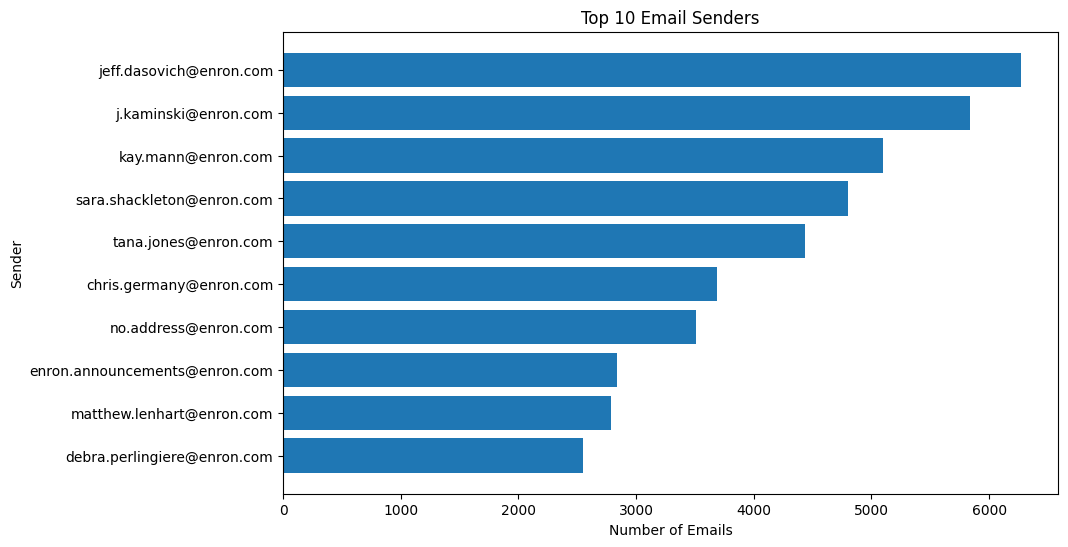

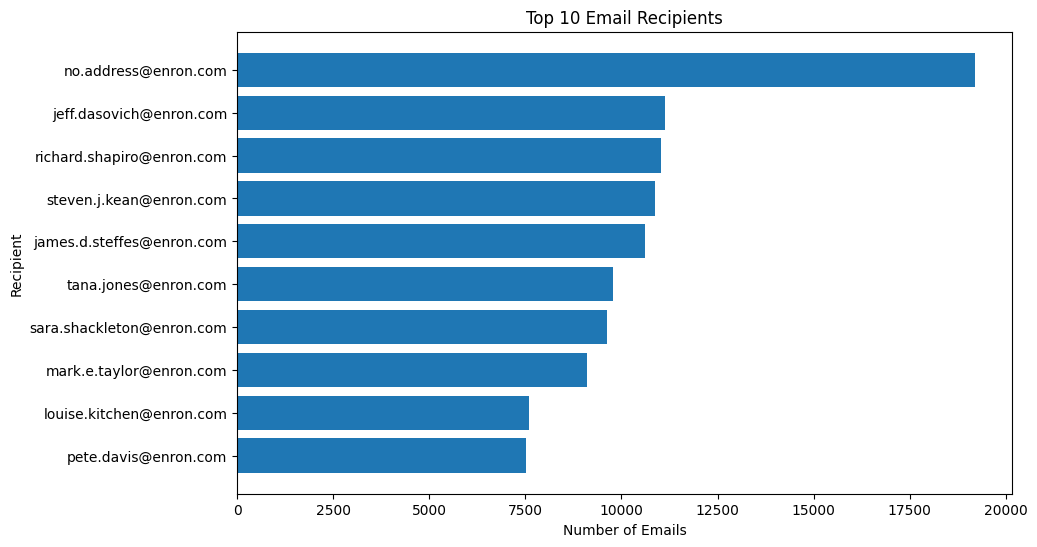

In [33]:
# Plot top 10 senders
plt.figure(figsize=(10,6))
plt.barh(df_senders['sender'][:10], df_senders['count'][:10])
plt.xlabel('Number of Emails')
plt.ylabel('Sender')
plt.title('Top 10 Email Senders')
plt.gca().invert_yaxis()
plt.show()

# Plot top 10 recipients
plt.figure(figsize=(10,6))
plt.barh(df_rvalue['rvalue'][:10], df_rvalue['count'][:10])
plt.xlabel('Number of Emails')
plt.ylabel('Recipient')
plt.title('Top 10 Email Recipients')
plt.gca().invert_yaxis()
plt.show()



In [35]:
query = "SELECT rtype, COUNT(*) AS count FROM Recipientinfo GROUP BY rtype;"
df_recipient_type = pd.read_sql_query(query, conn)

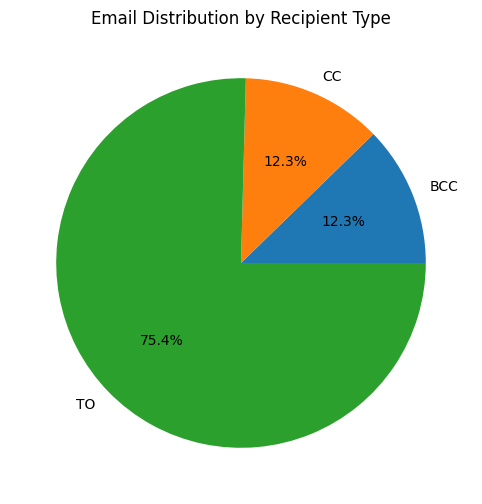

In [36]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_recipient_type['count'], labels=df_recipient_type['rtype'], autopct='%1.1f%%')
plt.title('Email Distribution by Recipient Type')
plt.show()

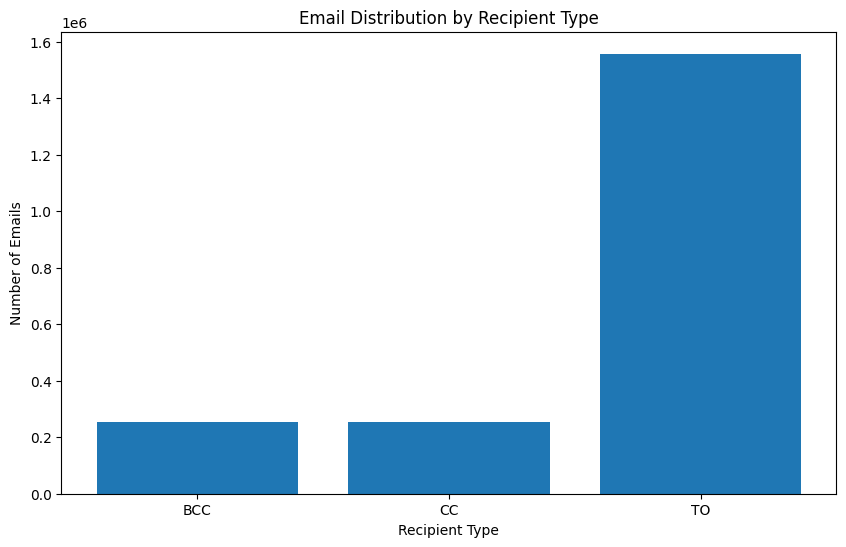

In [38]:
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_recipient_type['rtype'], df_recipient_type['count'])
plt.xlabel('Recipient Type')
plt.ylabel('Number of Emails')
plt.title('Email Distribution by Recipient Type')
plt.show()

In [39]:
query = "SELECT subject FROM Message;"
df_subjects = pd.read_sql_query(query, conn)

In [41]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# Tokenize and process the subjects
stop_words = set(stopwords.words('english'))
keywords = []
for subject in df_subjects['subject']:
    tokens = word_tokenize(subject.lower())
    keywords.extend([token for token in tokens if token.isalpha() and token not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Analyze the frequency of keywords
freq_dist = nltk.FreqDist(keywords)

# Get the most frequently occurring keywords and their counts
top_keywords = freq_dist.most_common(10)

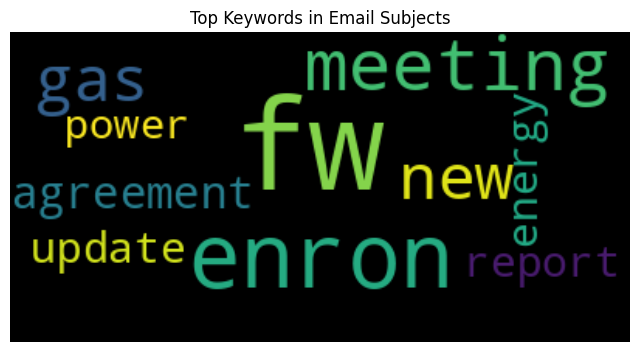

In [44]:
from wordcloud import WordCloud

# Create a word cloud from the top keywords
wordcloud = WordCloud().generate_from_frequencies(dict(top_keywords))

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Email Subjects')
plt.show()

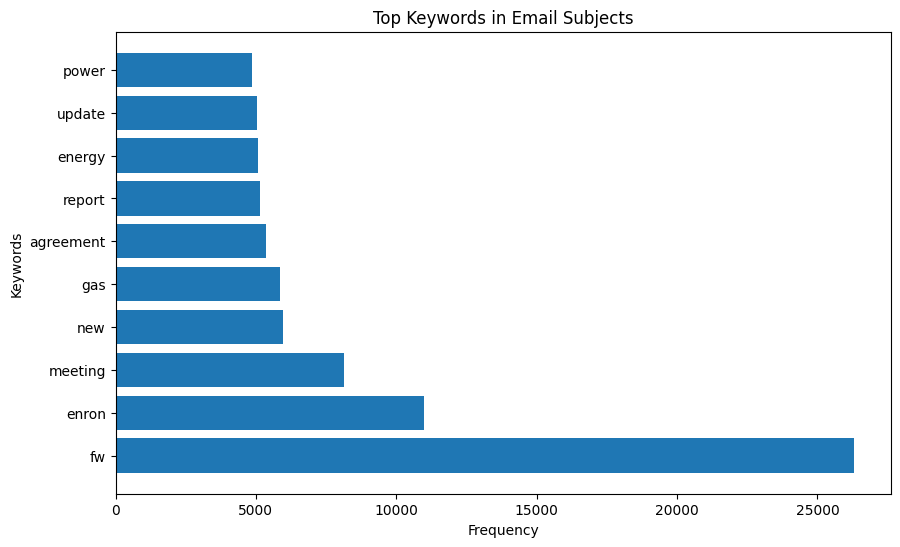

In [45]:
# Extract the keywords and their counts
keywords = [keyword for keyword, count in top_keywords]
counts = [count for keyword, count in top_keywords]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(keywords, counts)
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top Keywords in Email Subjects')
plt.show()

In [47]:
# Query to get the sender email addresses
query_sender = "SELECT DISTINCT sender FROM Message;"
df_sender = pd.read_sql_query(query_sender, conn)

# Query to get the recipient email addresses
query_rvalue = "SELECT DISTINCT rvalue FROM Recipientinfo;"
df_rvalue = pd.read_sql_query(query_rvalue, conn)

In [66]:
# Query to get the employee email addresses
query_employees = "SELECT Email_id FROM Employeelist;"
df_employees = pd.read_sql_query(query_employees, conn)

In [65]:
# Determine internal communication (between employees)
internal_communication = df_sender[df_sender['sender'].isin(df_employees['Email_id'])]

# Determine external communication (between employees and external contacts)
external_communication = df_rvalue[~df_rvalue['rvalue'].isin(df_employees['Email_id'])]


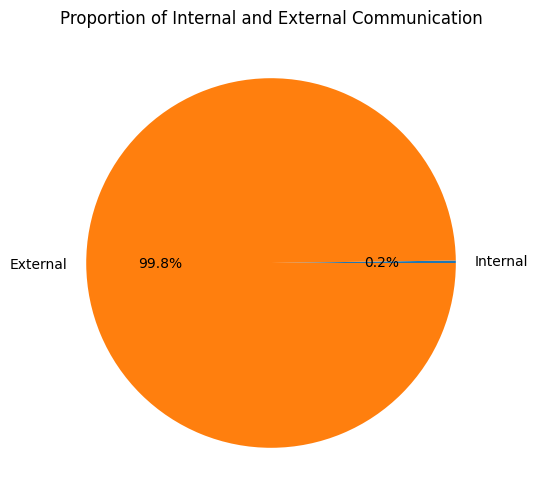

In [67]:
# Calculate the proportions
internal_proportion = len(internal_communication) / (len(internal_communication) + len(external_communication))
external_proportion = len(external_communication) / (len(internal_communication) + len(external_communication))

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([internal_proportion, external_proportion], labels=['Internal', 'External'], autopct='%1.1f%%')
plt.title('Proportion of Internal and External Communication')
plt.show()


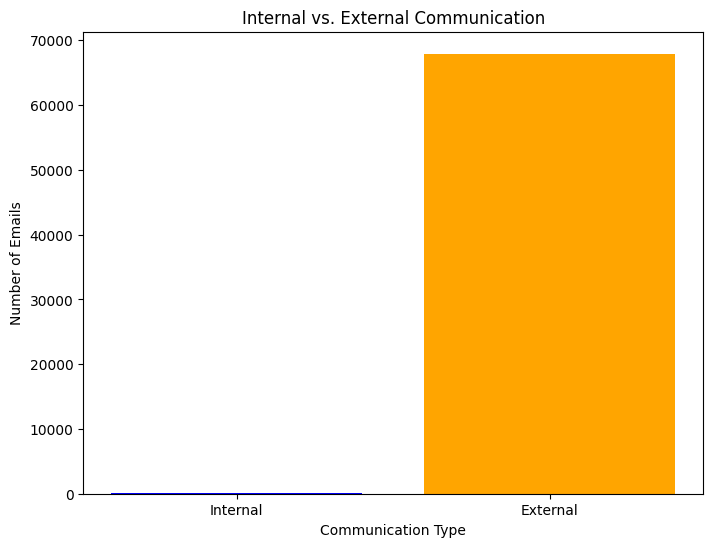

In [68]:
# Create a stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Internal', 'External'], [len(internal_communication), len(external_communication)], color=['blue', 'orange'])
plt.xlabel('Communication Type')
plt.ylabel('Number of Emails')
plt.title('Internal vs. External Communication')
plt.show()

# SQLite3 Support Tools

Some tools to inspect the database (*Not needed for assignment*)

* [DB Browser for SQLite3](https://sqlitebrowser.org/)
* [SQLiteStudio](https://sqlitestudio.pl/)